# Data exploration: Question

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path = r'..\data\raw\Questions_meta_translated.xlsx'

In [3]:
df = pd.read_excel(path, index_col=0)

In [4]:
df.head()

variable  \
1     q_ki_taille_menagehotesmeilleure_estimation   
2  q_ki_taille_menagedeplacesmeilleure_estimation   
3                             femme_hoh_prop_hote   
4                          femme_hoh_prop_deplace   
5                            calc_handi_physhotes   

                                               label  \
1  Parmis les ménages HOTES dans le quartier ${qu...   
2  Parmis les ménages DEPLACES dans le quartier $...   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                    label_translated question.type q_choices  \
1  Among the HOST households in the $ {district} ...       decimal       NaN   
2  Among the DISPLACED households in the $ {distr...       decimal       NaN   
3                                                NaN       integer       NaN   
4                                                NaN       integer       NaN   
5                                                NaN       integer       NaN   

         type  rank       sector   Statut ordinal_perc            Key  \
1      number   NaN  demographic     Hote          NaN  taille_menage   
2      number   NaN  demographic  Deplace          NaN  taille_menage   
3  percentage   NaN  demographic     Hote          NaN       sexe_hhh   
4  percentage   NaN  demographic  Deplace          NaN       sexe_hhh   
5  percentage   NaN  demographic     Hote          NaN          handi   

      level comment        Key_bck pilot inwomen  \
1       NaN     NaN  taille_menage   NER     NaN   
2       NaN     NaN  taille_menage   NER     NaN   
3     Femme      ok       sexe_hhh   NER     NaN   
4     Femme      ok       sexe_hhh   NER     NaN   
5  Handicap      ok          handi   NER     NaN   

                                             ki_data          indicator  \
1                               4-/-5-/-12-/-19-/-24            hh_size   
2                                 3-/-5-/-6-/-9-/-21            hh_size   
3                                                NaN         women_HoHH   
4                                                NaN         women_HoHH   
5  0.02-/-0.04-/-0.0545454545454545-/-1.142857142...  physic_disability   

  polarise  Unnamed: 20  
1  neutral     0.454526  
2  neutral     0.674448  
3  neutral     0.108803  
4  neutral     0.141803  
5     over     0.026016

## Number of each question type
In this dataset, there are three columns including information about question types (question.type, type and rank).
Since the rank column has binary information with lots of NaN, only the question.type and type columns are analyzed. 

#### Column: question.type

In [7]:
df['question.type'].value_counts()

select_one             119
integer                 54
select_one_external      4
decimal                  2
Name: question.type, dtype: int64

<AxesSubplot:>

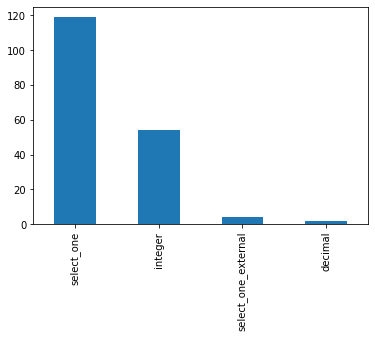

In [5]:
df['question.type'].value_counts().plot.bar()

#### Column: Type

In [7]:
df['type'].value_counts()

rank            192
rankperc        107
ordinal          92
rank_integer     77
rank1            69
percentage       56
number           50
select_one       36
not_process      33
Name: type, dtype: int64

<AxesSubplot:>

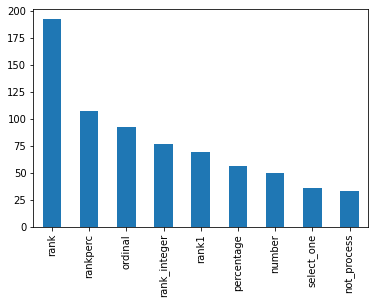

In [13]:
plt.figure()
df['type'].value_counts().plot.bar()

## Sector

In [9]:
df['sector'].value_counts()

health          153
education       139
wash            135
Livelihood       53
Health           44
demographic      41
WASH             40
Displacement     36
Shelter          34
Food             16
assistance        9
shelter           7
displacement      3
Assistance        2
Name: sector, dtype: int64

<AxesSubplot:>

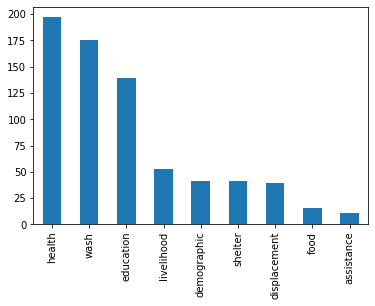

In [81]:
plt.figure()
df['sector'].value_counts().plot.bar()

## Heatmap of the number of overlapping question types and sectors
For column 'sector' and 'type', the number of overlapping questions can be counted and visualized as a heatmap.

In [10]:
df['sector'] = df['sector'].str.lower()
df['type'] = df['type'].str.lower()

In [11]:
grouped=df.groupby(['sector','type'])

In [14]:
df_gr = grouped.count()['variable']

In [16]:
df_gr2 = df_gr.reset_index().pivot(columns='type',index='sector',values='variable')

In [17]:
df_gr2 = df_gr2.fillna(0)

In [21]:
df_gr2.head()

type          not_process  number  ordinal  percentage  rank  rank1  \
sector                                                                
assistance            4.0     0.0      0.0         0.0   5.0    2.0   
demographic           1.0    10.0     13.0        11.0   3.0    0.0   
displacement          4.0     1.0      2.0         3.0  29.0    0.0   
education             4.0     7.0     52.0        10.0  24.0    0.0   
food                  0.0     0.0      2.0         2.0   0.0    4.0   

type          rank_integer  rankperc  select_one  
sector                                            
assistance             0.0       0.0         0.0  
demographic            0.0       3.0         0.0  
displacement           0.0       0.0         0.0  
education             10.0      14.0        18.0  
food                   4.0       4.0         0.0

<AxesSubplot:xlabel='type', ylabel='sector'>

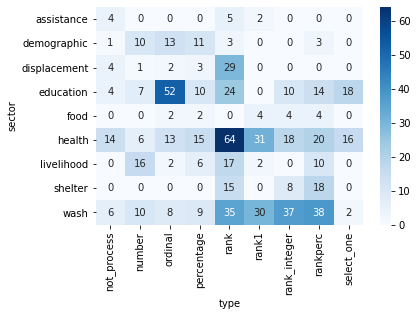

In [18]:
sns.heatmap(df_gr2, cmap="Blues", annot=True)